In [33]:
import librosa
audio = 'test.wav'
x , sr = librosa.load(audio)
print(type(x), type(sr))

<class 'numpy.ndarray'> <class 'int'>


## Musical Information Retrieval

In [34]:
librosa.load(audio, sr=44100)


(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 44100)

In [35]:
import IPython.display as ipd
ipd.Audio(audio)

# Display Waveform

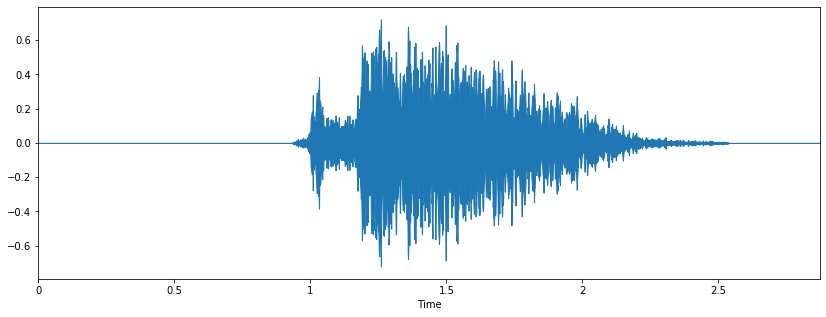

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [ ]:
0.6 is the highes peak, i.e., the highest volume or the highest frequency amplitude

## display Spectrogram

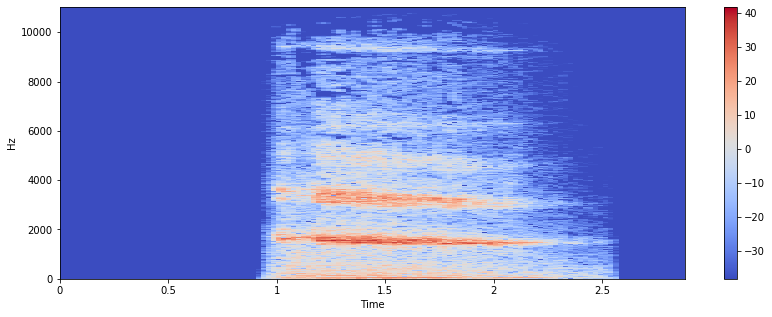

In [37]:

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 
plt.colorbar()

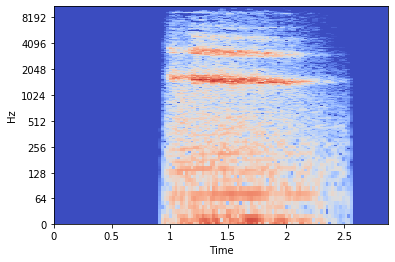

In [38]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')

### Zero Crossing Rate


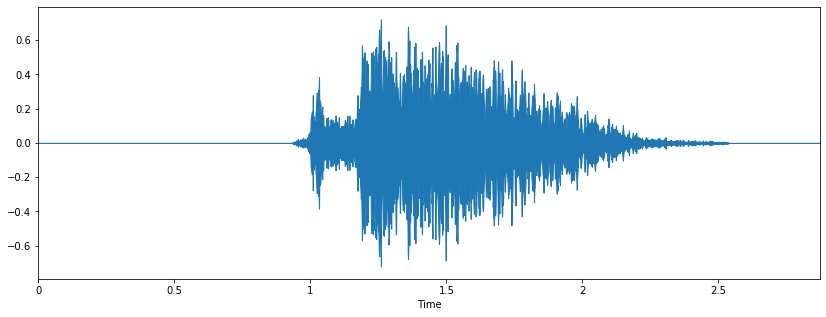

In [39]:
x, sr = librosa.load(audio)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

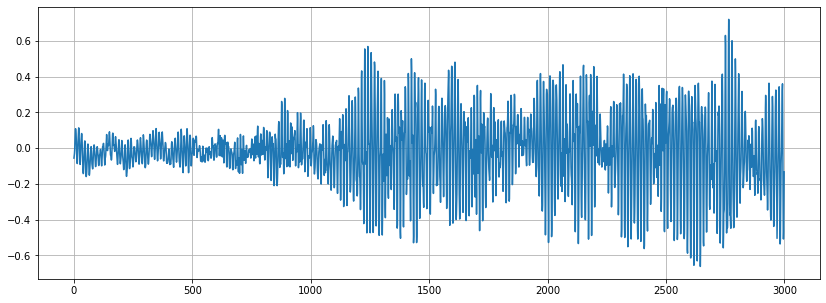

In [40]:
# Zooming in
n0 = 25000
n1 = 28000
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [41]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

506


### Spectral_Centroid 

In [42]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

(124,)

##### Computing the time variable for visualization

In [43]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

##### Normalising the spectral centroid for visualisation

In [44]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

##### Plotting the Spectral Centroid along the waveform

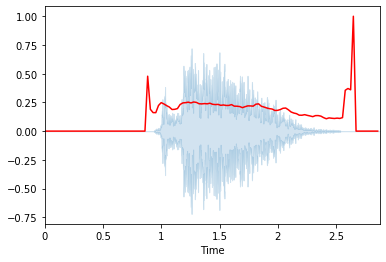

In [45]:
librosa.display.waveplot(x, sr=sr, alpha=0.2)
plt.plot(t, normalize(spectral_centroids), color='r')

### Spectral_Rolloff


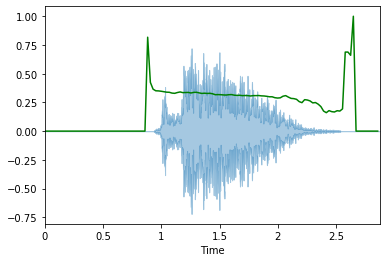

In [46]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='g')

### MFCC — Mel-Frequency Cepstral Coefficients

(20, 124)


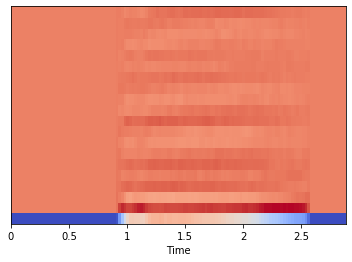

In [47]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [48]:
### Now we take this file and ana